## K-Means Clustering from Scratch

In [1059]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

### Loading data

In [1060]:
path = 'Data.csv'

In [1061]:
def path_(path):
    
    data = pd.read_csv(path)
    
    data = (data - data.mean()) / data.std() # Standarization
    return data

In [1062]:
data = path_(path)
data

,f1,f2,f3,f4
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


In [1063]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
f1,150.0,-1.457168e-15,1.0,-1.863780,-0.897674,-0.052331,0.672249,2.483699
f2,150.0,-1.638319e-15,1.0,-2.425820,-0.590395,-0.131539,0.556746,3.080455
f3,150.0,-1.292300e-15,1.0,-1.562342,-1.222456,0.335354,0.760211,1.779869
f4,150.0,-5.543714e-16,1.0,-1.442245,-1.179859,0.132067,0.788031,1.706379


In [1114]:
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i%self.k] = data[i%self.k]
            #print(self.centroids[i%self.k])

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in range(len(data)):
                distances = [np.linalg.norm(data[featureset]-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
    
                self.centroids[classification] = np.average(data[self.classifications[classification],:],axis=0)
                
        return self.centroids, self.classifications

In [1115]:
clf = K_Means(k=3, tol=0.001, max_iter=300)

centroids, classes = clf.fit(data.values)

In [1116]:
centroids

{0: array([1.16353612, 0.14481784, 0.99967656, 1.02656282]),
 1: array([-0.0113575 , -0.8730834 ,  0.37581671,  0.3101145 ]),
 2: array([-1.01119138,  0.85041372, -1.30063009, -1.25070352])}

In [1117]:
def to_array(x):
    centres=[]
    for i in range(len(x.keys())):
        centres.append(list(x[i]))
    return np.array(centres)

In [1118]:
centres =to_array(centroids)

In [1119]:
label_s = []
index_list = []

for i in range(len(classes.keys())):
    label_s.extend([list(classes.keys())[i] for j in range(len(classes[i]))])
    index_list.extend(classes[i])
    
data_new = data.iloc[index_list, [i for i in range(data.shape[1])]]
data_new["labels"] = label_s

In [1120]:
data_new

,f1,f2,f3,f4,labels
50,1.396829,0.327318,0.533621,0.263260,0
51,0.672249,0.327318,0.420326,0.394453,0
52,1.276066,0.097889,0.646916,0.394453,0
56,0.551486,0.556746,0.533621,0.525645,0
65,1.034539,0.097889,0.363678,0.263260,0
...,...,...,...,...,...
45,-1.259964,-0.131539,-1.335752,-1.179859,2
46,-0.897674,1.703886,-1.222456,-1.311052,2
47,-1.501490,0.327318,-1.335752,-1.311052,2
48,-0.656147,1.474458,-1.279104,-1.311052,2


Text(0.5, 1.0, 'Plot of the data into clusters')

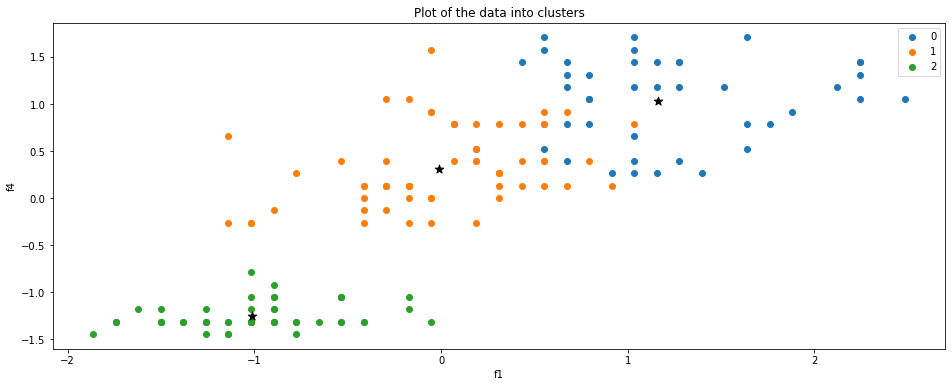

In [1121]:
l_labels = np.unique(label_s)

plt.figure(figsize=(16,6))

for i in l_labels:
    plt.scatter(data_new.loc[data_new['labels'] == i, 'f1'], data_new.loc[data_new['labels'] == i, 'f4'], label = i)
    
plt.scatter(centres[:,0], centres[:,3], s = 80, color = 'k', marker='*')
plt.legend()
plt.xlabel("f1")
plt.ylabel("f4")
plt.title("Plot of the data into clusters")

# PCA from Scratch

In [901]:
class PCA:
    
    def __init__(self, X):
        self.X = X
# cov_mat = data.cov()
# cov_mat

    def fit_PCA(self):
        
        conv_mat = (1/len(self.X))*(self.X.T @ self.X + 1)
        
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)
        
        #axe = np.arange(4)+1

        # Creating a 2 dimensional numpy array
        #df = np.array([axe, eig_vals])
        
        dic__ = {'axe' : np.arange(4)+1,
        'eigen_values' : eig_vals
        }
        pdv = pd.DataFrame(dic__)
        pdv['proportion'] = pdv['eigen_values']/pdv['eigen_values'].sum()*100
        pdv['pct_cumule'] = pdv['proportion'].cumsum()
        
        top2eig = eig_vecs[:,0:2] # Two top eigenvalues
        
        new_data = self.X @ top2eig # transsform data projection
        
        #creating a new dataframe including target
        new_df = pd.DataFrame(np.hstack((new_data,np.array(data_new[["labels"]]).reshape(-1,1))),columns=['F1','F2','labels'])
        
        return new_df
    
    def plotting_pca(self):
        
        new_df = self.fit_PCA()
        
        
        #plotting data

        lb = np.unique(new_df['labels'])

        plt.figure(figsize=(16,9))
        for i in lb:
            plt.scatter(new_df.loc[new_df['labels'] == i, "F1"], new_df.loc[new_df['labels'] == i, "F2"], label = i)

            plt.title('Result of PCA for 2 component')
            plt.xlabel("F1")
            plt.ylabel("F2")

            plt.legend()
        plt.show()

In [902]:
pca = PCA(data)

In [903]:
pca.fit_PCA()

,F1,F2,labels
0,-2.254117,-0.492629,0.0
1,-2.078629,0.659333,0.0
2,-2.358471,0.325283,0.0
3,-2.295412,0.580027,0.0
4,-2.377580,-0.660287,0.0
...,...,...,...
145,1.866813,-0.373873,2.0
146,1.553376,0.904239,2.0
147,1.517934,-0.258756,2.0
148,1.375676,-1.002232,2.0


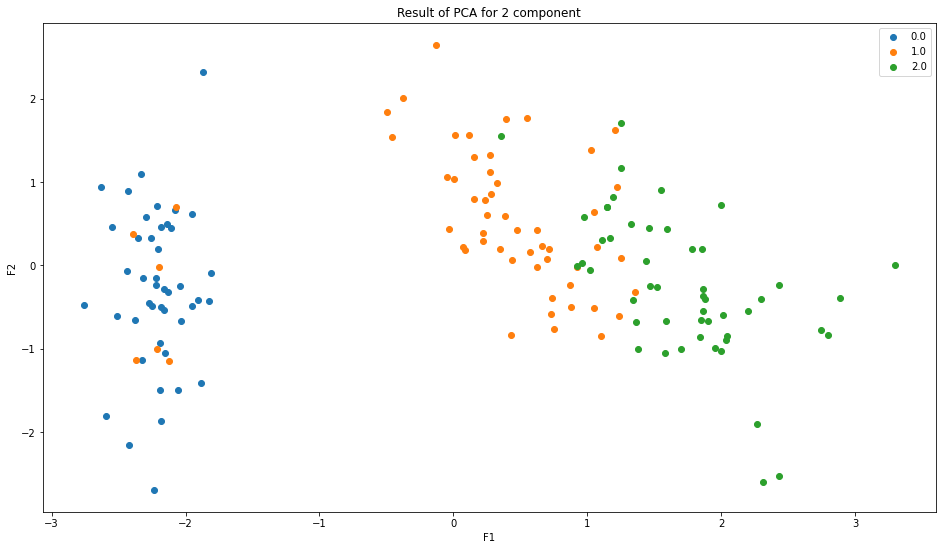

In [904]:
pca.plotting_pca()